In [249]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "../outputs/12_26/"
model_list = ["Qwen/Qwen2.5-32B-Instruct", "Qwen/Qwen2.5-14B-Instruct", "Qwen/Qwen2.5-7B-Instruct", "Qwen/Qwen2.5-3B-Instruct", "Qwen/Qwen2.5-1.5B-Instruct", "mistralai/Mathstral-7B-v0.1"]

colors = ["red", "orange", "green", "blue", "purple", "pink", "brown", "gray", "black", "white"]

In [250]:
def gen_budget_list(budget, data_name):
    # 注意有的模型性能比较好，在某些数据集上没跑完全部的budget
    if budget <0:
        return [-1]
    else: 
        if data_name == "gsm8k":
            budget_list = []
            for i in range(25, 501, 25):
                budget_list.append(i)
            # for i in range(500, 601, 50):
            #     budget_list.append(i)
        elif data_name == "math":
            budget_list = []
            for i in range(25, 1001, 25):
                budget_list.append(i)
            # for i in range(1000, 1501, 50):
            #     budget_list.append(i)
        return budget_list

In [251]:

prompt_type1 = "qwen25-math-cot"
prompt_type2 = "coarse-to-fine-qwen"
prompt_type3 = "mathstral-step-by-step"
prompt_type4 = "mathstral-coarse-to-fine"

dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"
budget_list = gen_budget_list(1, dataset)

In [252]:
acc_lists1 = []
acc_lists2 = []
for model in model_list:
    acc_list1 = []
    acc_list2 = []
    for budget in budget_list:
        if model.startswith("Qwen"):
            file_name1 = "test_" + prompt_type1 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name2 = "test_" + prompt_type2 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path1 = os.path.join(file_dir, model, prompt_type1, dataset, file_name1)
            file_path2 = os.path.join(file_dir, model, prompt_type2, dataset, file_name2)
            
        else:
            file_name1 = "test_" + prompt_type3 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name2 = "test_" + prompt_type4 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path1 = os.path.join(file_dir, model, prompt_type3, dataset, file_name1)
            file_path2 = os.path.join(file_dir, model, prompt_type4, dataset, file_name2)
        with open(file_path1, "r") as f:
            acc_list1.append(json.load(f)["acc"])
        with open(file_path2, "r") as f:
            acc_list2.append(json.load(f)["acc"])

    # file_name1 = "test_" + prompt_type1 + something + "_metrics.json"
    # file_name2 = "test_" + prompt_type2 + something + "_metrics.json"
    # file_path1 = os.path.join(file_dir, model, prompt_type1, dataset, file_name1)
    # file_path2 = os.path.join(file_dir, model, prompt_type2, dataset, file_name2)
    # with open(file_path1, "r") as f:
    #     acc_list1.append(json.load(f)["acc"])
    # with open(file_path2, "r") as f:
    #     acc_list2.append(json.load(f)["acc"])
    acc_lists1.append(acc_list1)
    acc_lists2.append(acc_list2)

Text(0.5, 1.0, 'gsm8k Accuracy vs Token Budget')

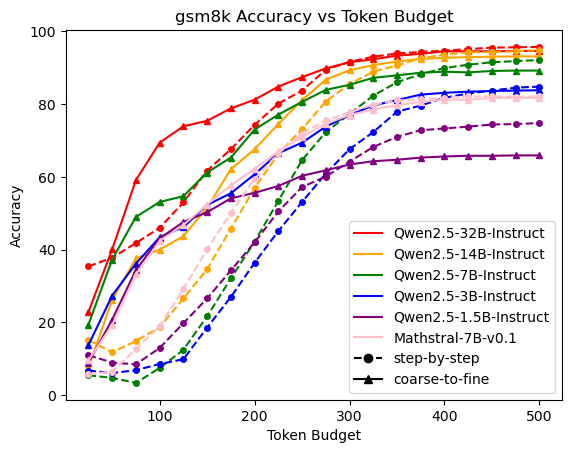

In [253]:
# plot
marker_size = 4  # Set the desired marker size

# Plot all lines first without labels
for index, model in enumerate(model_list):
    plt.plot(budget_list, acc_lists1[index], marker='o', markersize=marker_size, 
             linestyle='--', color=colors[index])
    plt.plot(budget_list, acc_lists2[index], marker='^', markersize=marker_size, 
             linestyle='-', color=colors[index])

# Add dummy plots for model legend (colors)
for index, model in enumerate(model_list):
    model_name = model.split('/')[-1]
    plt.plot([], [], color=colors[index], label=model_name)

# Add dummy plots for prompt type legend (line styles)
plt.plot([], [], color='black', linestyle='--', marker='o', label="step-by-step")
plt.plot([], [], color='black', linestyle='-', marker='^', label="coarse-to-fine")

plt.legend()
plt.xlabel("Token Budget")
plt.ylabel("Accuracy")
plt.title(dataset + " Accuracy vs Token Budget")